**CS306: DATA ANALYSIS AND VISUALIZATION**
---

LAB 3: Airline Data (Big) Analysis


STUDENT ID: 201801407

NAME: PRATVI SHAH

---



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline
import scipy.stats as stats
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Function to plot PDF & CDF and return the cumulative frequency distribution values for use in KSTest

In [3]:
def make_pdf_cdf(n_equal_bins,df_temp,attr):
    freq , bins= np.histogram(df_temp[attr],bins=n_equal_bins) 
    norm_freq=pd.Series(freq/freq.sum())#normalizing the frequencies
    cumulative_freq=[];
    cumulative_freq.append(norm_freq[0]);
    for i in range(1,len(norm_freq)):
        cumulative_freq.append(norm_freq[i]+cumulative_freq[i-1]);

    cumulative_freq=pd.Series(cumulative_freq);#The frequencies in CDF plot
    freq=pd.Series(freq)
    bins=pd.Series(bins)
    fig = plt.figure()
    
    fig, axs = plt.subplots(1,2,figsize =(18, 5)) 
    N, bins, patches=axs[0].hist(df_temp[attr],color="pink",edgecolor="black", 
                                    bins=bins,weights=np.zeros_like(df_temp[attr]) + 1. / len(df_temp[attr]))
    axs[0].set_xlabel(attr)
    axs[0].set_ylabel('Normalized Frequency');
    axs[0].set_title('PDF of '+ attr +' with Bins='+str(n_equal_bins))
    axs[0].grid()



    N, bins, patches=axs[1].hist(df_temp[attr],color="purple",edgecolor="black", bins=bins,weights=np.zeros_like(df_temp[attr]) + 1. / len(df_temp[attr]),cumulative=1)
    axs[1].set_xlabel(attr)
    axs[1].set_ylabel('Normalized Frequency');
    axs[1].set_title('CDF of '+attr+ ' with Bins='+str(n_equal_bins))
    axs[1].grid()
    return cumulative_freq


    

### 1) Excel has a limit of maximum row 1048576 by 16384 columns. The file loaded was of size 1048576x29. 

In [4]:
df=pd.read_csv('2008.csv.bz2')

In [5]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


### 2) Size of the file in python came out to be 7009728x29

In [8]:
rows=df.shape[0]
print('Rowcount: ',rows)


Rowcount:  7009728


### 3) Filtering AirTime and Distance from the data 

In [10]:
data=df[['AirTime','Distance']]
data=data.dropna()
for i in data.columns:
    data=data[data['{}'.format(i)].notnull()]
row_count=data.shape[0]
print(data.head())

   AirTime  Distance
0    116.0       810
1    113.0       810
2     76.0       515
3     78.0       515
4     77.0       515


***Plotting data to check for outliers***

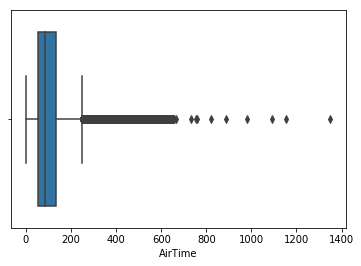

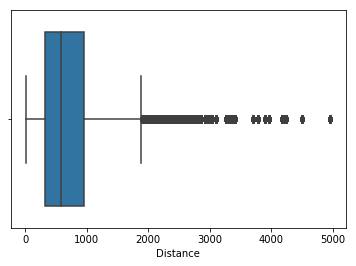

In [11]:
sns.boxplot(data['AirTime'])
plt.show()
sns.boxplot(data['Distance'])
plt.show()


***Handling outliers using the interquartile range method***

In [12]:
cols=data.columns
for i in cols:
    Q1 = data['{}'.format(i)].quantile(0.25)
    Q3 = data['{}'.format(i)].quantile(0.75)
    IQR = Q3 - Q1
    m1=Q1 - (1.5 * IQR)
    m2=Q3 + (1.5 * IQR)
    #print(Q1,Q3,IQR,m1,m2)
    data=data[~((data['{}'.format(i)] < (Q1 - 1.5 * IQR)) |(data['{}'.format(i)] > (Q3 + 1.5 * IQR)))]
    
print('Airtime mean: ',data['AirTime'].mean())
print('Airtime standard deviation: ',data['AirTime'].std())
print('Distance mean: ',data['Distance'].mean())
print('Distance standard deviation: ',data['Distance'].std())

Airtime mean:  90.49131646668722
Airtime standard deviation:  46.709084701779965
Distance mean:  612.8610493100866
Distance standard deviation:  379.8788457114467


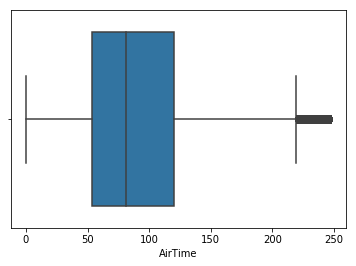

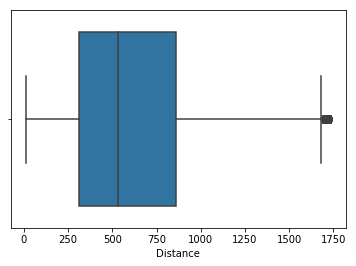

Text(0, 0.5, 'Distance')

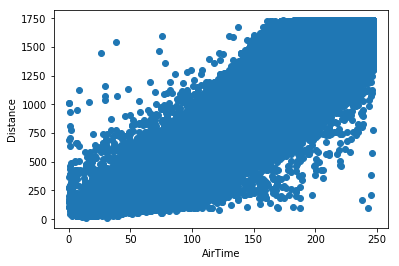

In [13]:
sns.boxplot(data['AirTime'])
plt.show()
sns.boxplot(data['Distance'])
plt.show()
plt.plot(data['AirTime'],data['Distance'],'o')
plt.xlabel('AirTime')
plt.ylabel('Distance')

***Normalizing the data***

In [14]:
data=(data-data.mean())/data.std()
print(data.head())
print()
print('Airtime mean: ',data['AirTime'].mean())
print('Airtime standard deviation: ',data['AirTime'].std())
print('Distance mean: ',data['Distance'].mean())
print('Distance standard deviation: ',data['Distance'].std())
print()
print(data.describe())
row_count=data.shape[0]

    AirTime  Distance
0  0.546118  0.518952
1  0.481891  0.518952
2 -0.310246 -0.257611
3 -0.267428 -0.257611
4 -0.288837 -0.257611

Airtime mean:  -6.970740463773581e-15
Airtime standard deviation:  0.9999999999925508
Distance mean:  -5.014921822888421e-15
Distance standard deviation:  1.0000000000015736

            AirTime      Distance
count  6.357320e+06  6.357320e+06
mean  -6.970740e-15 -5.014922e-15
std    1.000000e+00  1.000000e+00
min   -1.937339e+00 -1.584350e+00
25%   -7.812467e-01 -7.998894e-01
50%   -2.032007e-01 -2.102277e-01
75%    6.317547e-01  6.532055e-01
max    3.350712e+00  2.948674e+00


***Plotting the PDF and CDF with 50 bins***

<Figure size 432x288 with 0 Axes>

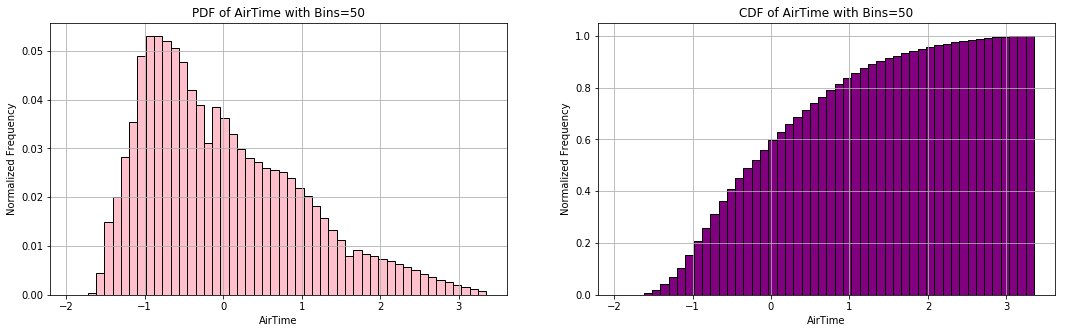

<Figure size 432x288 with 0 Axes>

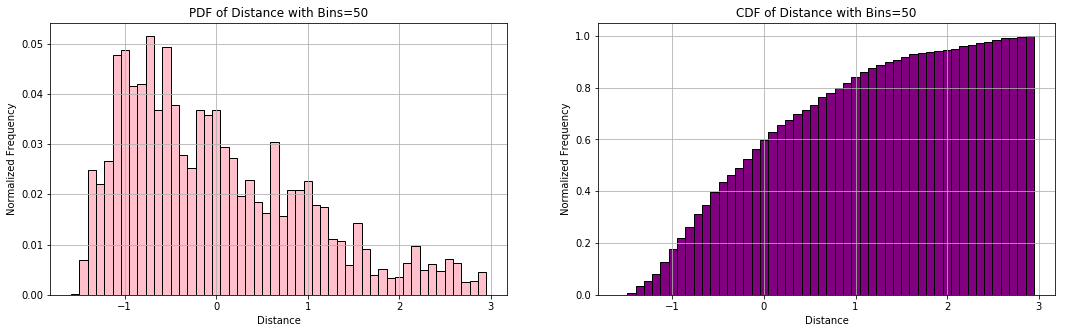

In [15]:
airtime_cdf=make_pdf_cdf(50,data,'AirTime')
distance_cdf=make_pdf_cdf(50,data,'Distance')

### 4) Generating random samples of Standard Normal distribution

In [17]:
df_norm=pd.DataFrame(np.random.randn(row_count, 2), columns=['Sample1','Sample2'])

***Verifying the correctness of the randomly generated data using plots and verifying mean, standard deviation = $N(0,1)$***

Mean of sample1:  0.0004041560103072082
Standard deviation of sample1:  0.999527365952908
Mean of sample2:  0.00051905985833027
Standard deviation of sample2:  1.0000332783311976


<Figure size 432x288 with 0 Axes>

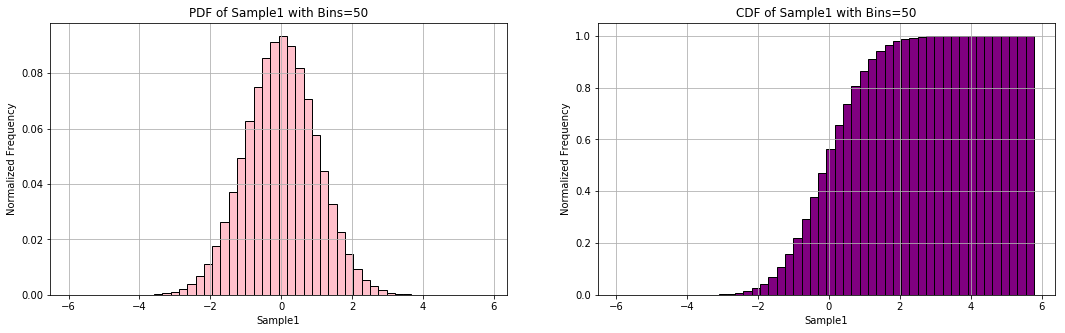

<Figure size 432x288 with 0 Axes>

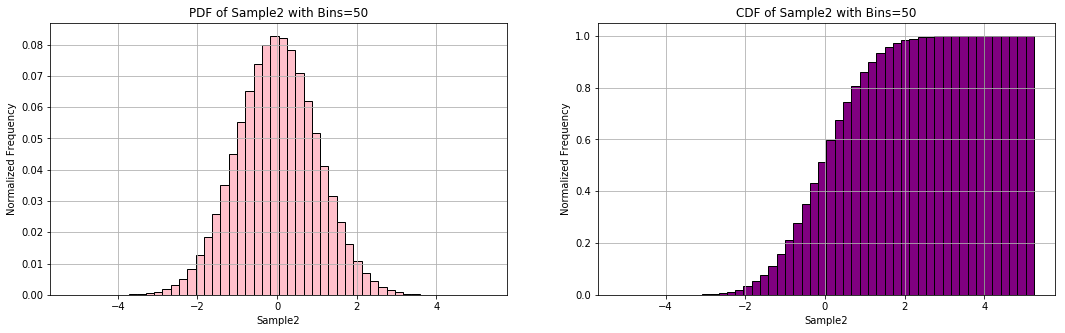

In [18]:
sample1_cdf=make_pdf_cdf(50,df_norm,'Sample1')
sample2_cdf=make_pdf_cdf(50,df_norm,'Sample2')
print('Mean of sample1: ',df_norm['Sample1'].mean())
print('Standard deviation of sample1: ',df_norm['Sample1'].std())
print('Mean of sample2: ',df_norm['Sample2'].mean())
print('Standard deviation of sample2: ',df_norm['Sample2'].std())

### 5) \& 6) KSTest for $Distance$ feature to find out if it is normally distributed or not

In [19]:
#attributes: 
# df1=dataframe1
# df4=dataframe2
# b=boolean for different functioning
# D=test statistic
# n=length of dataframe1
# m=length of dataframe2
# dt=step size for incrementing alpha value to find the critical value

def alpha(df1,df4,b,D,n,m,dt):
    if b==True:
        norm=df4.copy();
        dist=df1.copy();
        D = 0

        #finding the supremum for KS-test
        for i in range(len(dist)):
            if (D < abs(norm[i]-dist[i])):
                D = abs(norm[i]-dist[i])
    
    
    verdict=[];
    rhs=[];
    d=[]
    A=[];
    
    #Taking alpha to find the turning point in the status of hypothesis testing
    for a in np.arange(1,50,2):
        alpha=a*dt
        RHS = np.sqrt((n+m)/(n*m));
        RHS = RHS*np.sqrt(-0.5*np.log(alpha/2))
        rhs.append(RHS)
        d.append(D)
        A.append(alpha)
        if D>RHS:
            verdict.append('Rejected')#null-hypothesis is rejected when D>RHS is satisfied
        else:
            verdict.append('Accepted')#null-hypothesis is rejected when D<=RHS is satisfied

    A=pd.Series(A)
    rhs=pd.Series(rhs)
    verdict=pd.Series(verdict)
    d=pd.Series(d)
    frame={'Alpha':A,'D':d,'RHS':rhs,'Null Hypothesis':verdict}
    ans=pd.DataFrame(frame);
    return ans

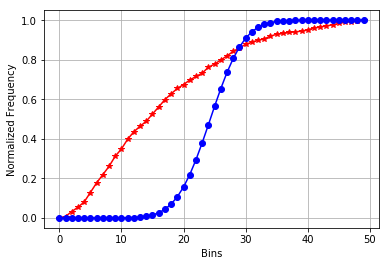

In [21]:
#This is the plot of cdf of the data we wish to compare to 
#the random sample of standard normal distribution that we generated
#This step has major approximations but it allows us to 
#find the critical value of alpha with the given computational limitations of our PC
plt.plot(distance_cdf,'r-*')
plt.plot(sample1_cdf,'b-o')
plt.xlabel('Bins')
plt.ylabel('Normalized Frequency')
plt.grid()

KSTest for different values of alpha

In [22]:
dt=0.0000001
alpha(distance_cdf,sample1_cdf,True,0,len(distance_cdf),len(sample1_cdf),dt)

,Alpha,D,RHS,Null Hypothesis
0,1.000000e-07,0.557969,0.579849,Accepted
1,3.000000e-07,0.557969,0.560582,Accepted
2,5.000000e-07,0.557969,0.551395,Rejected
3,7.000000e-07,0.557969,0.545258,Rejected
4,9.000000e-07,0.557969,0.540630,Rejected
5,1.100000e-06,0.557969,0.536905,Rejected
6,1.300000e-06,0.557969,0.533784,Rejected
7,1.500000e-06,0.557969,0.531097,Rejected
8,1.700000e-06,0.557969,0.528735,Rejected
9,1.900000e-06,0.557969,0.526627,Rejected


The above methodology had many approximations and from the result we got critical value of alpha to be between 3 to 5e-07  and D=0.557969. From this we can say that for alpha>=5e-07 we **reject the null hypothesis i.e., the given data is not similar to the standard normal distribution.** 








In [23]:
D,pval=stats.ks_2samp(np.array(data['Distance']),np.array(df_norm['Sample1']))
print('D: ',D)
print('pval: ',pval)
alpha(None,None,False,D,len(data),len(df_norm),dt)

D:  0.09585737386194182
pval:  0.0


,Alpha,D,RHS,Null Hypothesis
0,1.000000e-07,0.095857,0.001626,Rejected
1,3.000000e-07,0.095857,0.001572,Rejected
2,5.000000e-07,0.095857,0.001546,Rejected
3,7.000000e-07,0.095857,0.001529,Rejected
4,9.000000e-07,0.095857,0.001516,Rejected
5,1.100000e-06,0.095857,0.001506,Rejected
6,1.300000e-06,0.095857,0.001497,Rejected
7,1.500000e-06,0.095857,0.001489,Rejected
8,1.700000e-06,0.095857,0.001483,Rejected
9,1.900000e-06,0.095857,0.001477,Rejected


We can observe from the above data that the approximation of 50 bins to replace the continuous cdf and to do KStest on the 50 bins gives us poor results. When we did the same operation considering the whole array and then the inbuilt function of kstest we found pval=0.0 and D=0.09535. From this we can say that if $c(\alpha)\sqrt{\dfrac{n+m}{nm}}$  is less than D then we reject the null hypothesis where $c(\alpha)=\sqrt{\dfrac{-\ln{(a/2)}}{2}}$ and n,m are the size of the two data arrays into consideration.

**From the inbuilt function be got D=0.09591 which is way less than the one obtained using the CDF thereby giving a tighter bound on the value of alpha. So, we can conclude that the value of alpha, above which we can reject the null hypothesis, is way less than 5e-07 which we got from above.**

## Second file

In [24]:
col=["Year", "Month", "DayofMonth", "DayOfWeek", 
    "DepTime", "CRSDepTime", "ArrTime", "CRSArrTime", "UniqueCarrier", 
    "FlightNum", "TailNum", "ActualElapsedTime", "CRSElapsedTime", 
    "AirTime", "ArrDelay", "DepDelay", "Origin", "Dest", "Distance", 
    "TaxiIn", "TaxiOut", "Cancelled", "CancellationCode", "Diverted", 
    "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", 
    "LateAircraftDelay", "Age"];
T = np.fromfile('airline.bin',int); 
t=pd.Series(T)
temp=t.values
data=temp.reshape((30,7009728))
df=pd.DataFrame(data)
df=df.transpose()

df.columns=col
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Age
0,2008,1,3,4,2003,1955,2211,2225,-2147483648,335,...,8,0,-2147483648,0,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648
1,2008,1,3,4,754,735,1002,1000,-2147483648,3231,...,10,0,-2147483648,0,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648
2,2008,1,3,4,628,620,804,750,-2147483648,448,...,17,0,-2147483648,0,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648
3,2008,1,3,4,926,930,1054,1100,-2147483648,1746,...,7,0,-2147483648,0,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648
4,2008,1,3,4,1829,1755,1959,1925,-2147483648,3920,...,10,0,-2147483648,0,2,0,0,0,32,-2147483648


In [25]:
newdata=df[['AirTime','Distance']]
newdata.head()

,AirTime,Distance
0,116,810
1,113,810
2,76,515
3,78,515
4,77,515


The airline.bin file was loaded using integer datatype hence, the nan values will be converted to garbage values.

**Otherwise on comparing the two dataFrames we could see that both the files are the same and hence the underlying analysis would give us the same output.**